In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("2021_2025_full_data.csv")

In [185]:
df

,Rank,Company,Revenue,Growth,Profit,Profit_Margin,Assets,Employees,Change,Years,Year
0,1,Walmart,"$680,985",5.1%,"$19,436",25.3%,"$260,823","2,100,000",-,31,2025
1,2,Amazon,"$637,959",11%,"$59,248",94.7%,"$624,894","1,556,000",-,17,2025
2,3,State Grid,"$548,414.4",0.5%,"$10,044.9",9.1%,"$797,694","1,354,310",-,25,2025
3,4,Saudi Aramco,"$480,193.5",-3%,"$104,982.3",-13%,"$645,097.2","75,118",-,7,2025
4,5,China National Petroleum,"$412,645.3",-2.2%,"$22,424",5.3%,"$607,615.1","985,155",1,25,2025
...,...,...,...,...,...,...,...,...,...,...,...
2495,496,Truist Financial,"$24,427",66.6%,"$4,482",39%,"$509,228","53,638",-,1,2021
2496,497,China Reinsurance (Group),"$24,376",18.1%,$827.6,-5.5%,"$69,513.7","63,914",-,1,2021
2497,498,Commonwealth Bank of Australia,"$24,362",-18.7%,"$6,457.1",5.4%,"$698,585.9","43,585",-82,17,2021
2498,499,Flextronics International,"$24,124",-0.4%,$613,599.9%,"$15,836","167,201",-,20,2021


# Data Cleaning

In [188]:
import re

def clean_money(x):
    """Remove $ , and convert to float. Bad values → NaN."""
    if pd.isna(x): return None
    x = str(x).replace("$", "").replace(",", "").strip()
    return pd.to_numeric(x, errors="coerce")

def clean_percentage(x):
    """Remove % and convert to float."""
    if pd.isna(x): return None
    x = str(x).replace("%", "").strip()
    return pd.to_numeric(x, errors="coerce")

def clean_int(x):
    """Remove commas and convert to int."""
    if pd.isna(x): return None
    x = str(x).replace(",", "")
    return pd.to_numeric(x, errors="coerce")


In [190]:
df["Rank"] = df["Rank"].astype(int)

In [192]:
df["Revenue"] = (df["Revenue"].astype(str).str.replace("$", "").str.replace(",", "").str.replace("-",""))
df["Revenue"] = pd.to_numeric(df["Revenue"])

In [194]:
df["Profit"] = (
    df["Profit"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.replace("-", "", regex=False)   # ← handles "-" cleanly
    .str.strip()
)

df["Profit"] = pd.to_numeric(df["Profit"], errors="coerce")

In [196]:
df["Assets"] = (df["Assets"].astype(str).str.replace("$", "").str.replace(",", ""))
df["Assets"] = pd.to_numeric(df["Assets"])

In [198]:
df["Employees"] = (df["Employees"].astype(str).str.replace(",", ""))
df["Employees"] = pd.to_numeric(df["Employees"]).astype("Int64")

In [200]:
df["Growth"] = (
    df["Growth"]
    .astype(str)
    .str.replace("%", "", regex=False)
    .str.replace("-", "", regex=False)
    .str.replace("—", "", regex=False)
    .str.replace("nan", "", regex=False)
    .str.replace(" ", "")
)
df["Growth"] = pd.to_numeric(df["Growth"], errors="coerce")

In [202]:
df["Profit_Margin"] = (
    df["Profit_Margin"]
    .astype(str)
    .str.replace("%", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.replace("-", "", regex=False)   # remove "-"
    .str.replace("—", "", regex=False)   # em-dash
    .str.replace("–", "", regex=False)   # en-dash
    .str.replace("nan", "", regex=False)
    .str.strip()
)
df["Profit_Margin"] = pd.to_numeric(df["Profit_Margin"], errors="coerce")

In [204]:
df["Years"] = pd.to_numeric(df["Years"]).astype("Int64")

In [206]:
df = df.drop(columns=["Change"])

In [208]:
num_cols = ["Revenue", "Profit", "Assets", "Growth", "Profit_Margin", "Employees"]

df[num_cols] = df[num_cols].fillna(0)

In [210]:
df.to_csv("fortune500_2021_2025.csv", index=False)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           2500 non-null   int32  
 1   Company        2500 non-null   object 
 2   Revenue        2500 non-null   float64
 3   Growth         2500 non-null   float64
 4   Profit         2500 non-null   float64
 5   Profit_Margin  2500 non-null   float64
 6   Assets         2500 non-null   float64
 7   Employees      2500 non-null   Int64  
 8   Years          2500 non-null   Int64  
 9   Year           2500 non-null   int64  
dtypes: Int64(2), float64(5), int32(1), int64(1), object(1)
memory usage: 190.6+ KB


In [214]:
df

,Rank,Company,Revenue,Growth,Profit,Profit_Margin,Assets,Employees,Years,Year
0,1,Walmart,680985.0,5.1,19436.0,25.3,260823.0,2100000,31,2025
1,2,Amazon,637959.0,11.0,59248.0,94.7,624894.0,1556000,17,2025
2,3,State Grid,548414.4,0.5,10044.9,9.1,797694.0,1354310,25,2025
3,4,Saudi Aramco,480193.5,3.0,104982.3,13.0,645097.2,75118,7,2025
4,5,China National Petroleum,412645.3,2.2,22424.0,5.3,607615.1,985155,25,2025
...,...,...,...,...,...,...,...,...,...,...
2495,496,Truist Financial,24427.0,66.6,4482.0,39.0,509228.0,53638,1,2021
2496,497,China Reinsurance (Group),24376.0,18.1,827.6,5.5,69513.7,63914,1,2021
2497,498,Commonwealth Bank of Australia,24362.0,18.7,6457.1,5.4,698585.9,43585,17,2021
2498,499,Flextronics International,24124.0,0.4,613.0,599.9,15836.0,167201,20,2021


In [38]:
df.tail()

,Rank,Company,Revenue,Growth,Profit,Profit_Margin,Assets,Employees,Years,Year
2495,496,Truist Financial,24427.0,66.6,4482.0,39.0,509228.0,53638,1,2021
2496,497,China Reinsurance (Group),24376.0,18.1,827.6,5.5,69513.7,63914,1,2021
2497,498,Commonwealth Bank of Australia,24362.0,18.7,6457.1,5.4,698585.9,43585,17,2021
2498,499,Flextronics International,24124.0,0.4,613.0,599.9,15836.0,167201,20,2021
2499,500,Rite Aid,24043.4,9.6,90.9,0.0,9335.4,50000,21,2021


In [40]:
df.describe()

,Rank,Revenue,Growth,Profit,Profit_Margin,Assets,Employees,Years,Year
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.0,2500.0,2500.000000
mean,250.499600,77259.205800,16.301240,6030.639720,113.691080,3.229493e+05,140042.766,17.9672,2023.000000
std,144.365817,71559.461296,27.610575,10911.165602,839.487428,6.854157e+05,176303.366322,9.998666,1.414496
min,1.000000,24043.400000,0.000000,0.000000,0.000000,2.648400e+03,101.0,1.0,2021.000000
25%,125.750000,38008.300000,4.100000,1012.425000,8.075000,4.862353e+04,46869.75,9.0,2022.000000
50%,250.500000,53370.500000,9.300000,2951.050000,25.900000,9.630100e+04,92845.5,19.0,2023.000000
75%,375.250000,86011.575000,18.700000,6461.975000,65.950000,2.474411e+05,171000.0,28.0,2024.000000
max,500.000000,680985.000000,816.100000,159069.000000,36793.100000,6.688552e+06,2300000.0,31.0,2025.000000


In [42]:
df.max()

Rank                                500
Company          Zurich Insurance Group
Revenue                        680985.0
Growth                            816.1
Profit                         159069.0
Profit_Margin                   36793.1
Assets                        6688551.8
Employees                       2300000
Years                                31
Year                               2025
dtype: object

In [44]:
df.value_counts()

Rank  Company                                Revenue   Growth  Profit   Profit_Margin  Assets     Employees  Years  Year
1     Walmart                                559151.0  6.7     13510.0  9.2            252496.0   2300000    27     2021    1
335   CHS                                    45590.0   4.6     1900.4   13.2           18957.4    10609      17     2024    1
333   Raizen                                 45473.9   1.7     758.3    818.3          24562.3    46000      4      2025    1
      TIAA                                   45734.8   11.8    1408.9   385.4          629369.9   16023      27     2024    1
334   Caixa Econômica Federal                45706.8   23.3    2349.7   24.1           377307.8   86962      4      2024    1
                                                                                                                           ..
167   Petronas                               75409.6   11.7    16320.1  22.3           168475.2   54105      28     2024   

In [46]:
df.isnull()

,Rank,Company,Revenue,Growth,Profit,Profit_Margin,Assets,Employees,Years,Year
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2495,False,False,False,False,False,False,False,False,False,False
2496,False,False,False,False,False,False,False,False,False,False
2497,False,False,False,False,False,False,False,False,False,False
2498,False,False,False,False,False,False,False,False,False,False


In [48]:
df

,Rank,Company,Revenue,Growth,Profit,Profit_Margin,Assets,Employees,Years,Year
0,1,Walmart,680985.0,5.1,19436.0,25.3,260823.0,2100000,31,2025
1,2,Amazon,637959.0,11.0,59248.0,94.7,624894.0,1556000,17,2025
2,3,State Grid,548414.4,0.5,10044.9,9.1,797694.0,1354310,25,2025
3,4,Saudi Aramco,480193.5,3.0,104982.3,13.0,645097.2,75118,7,2025
4,5,China National Petroleum,412645.3,2.2,22424.0,5.3,607615.1,985155,25,2025
...,...,...,...,...,...,...,...,...,...,...
2495,496,Truist Financial,24427.0,66.6,4482.0,39.0,509228.0,53638,1,2021
2496,497,China Reinsurance (Group),24376.0,18.1,827.6,5.5,69513.7,63914,1,2021
2497,498,Commonwealth Bank of Australia,24362.0,18.7,6457.1,5.4,698585.9,43585,17,2021
2498,499,Flextronics International,24124.0,0.4,613.0,599.9,15836.0,167201,20,2021


In [44]:
df2=df.iloc[0:500]

In [48]:
df3=df.iloc[500:1000]

In [52]:
df4=df.iloc[1000:1500]

In [56]:
df5=df.iloc[1500:2000]

In [60]:
df6=df.iloc[2000:2500]

# Univariante analysis

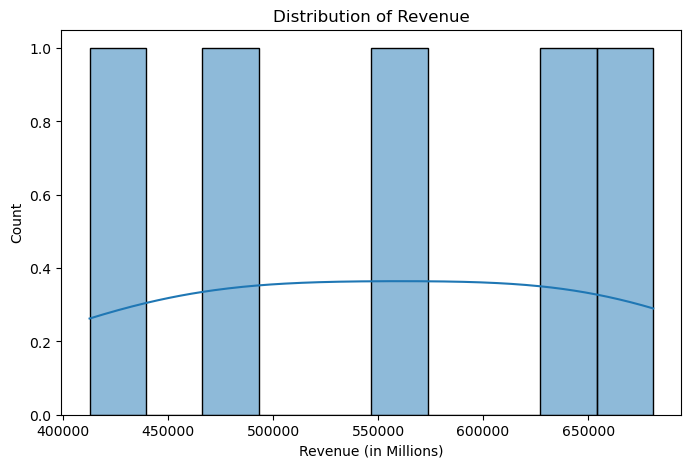

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
# Revenue
plt.figure(figsize=(8,5))
sns.histplot(df["Revenue"].head(), bins=10, kde=True)
plt.title("Distribution of Revenue")
plt.xlabel("Revenue (in Millions)")
plt.show()

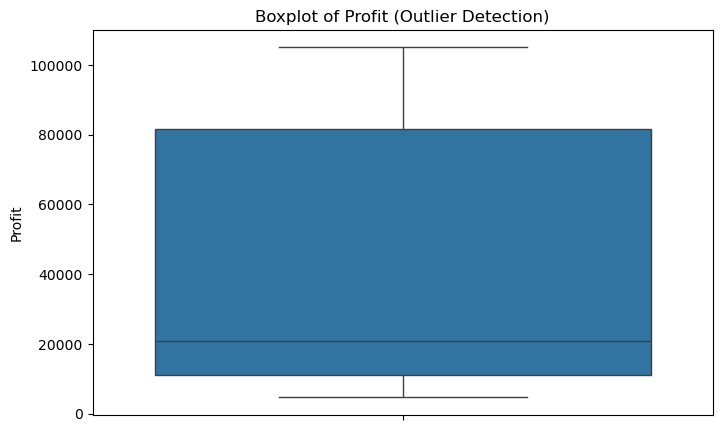

In [89]:
# Profit
plt.figure(figsize=(8,5))
sns.boxplot(y=df["Profit"].head(10))
plt.title("Boxplot of Profit (Outlier Detection)")
plt.show()

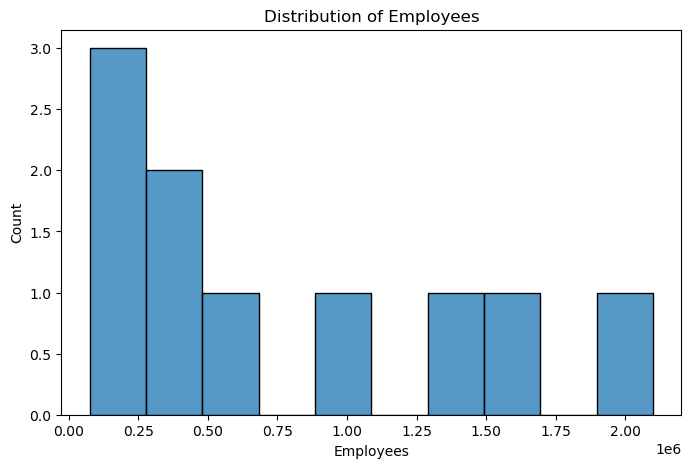

In [90]:
# Employees
plt.figure(figsize=(8,5))
sns.histplot(df["Employees"].head(10), bins=10, kde=False)
plt.title("Distribution of Employees")
plt.xlabel("Employees")
plt.show()

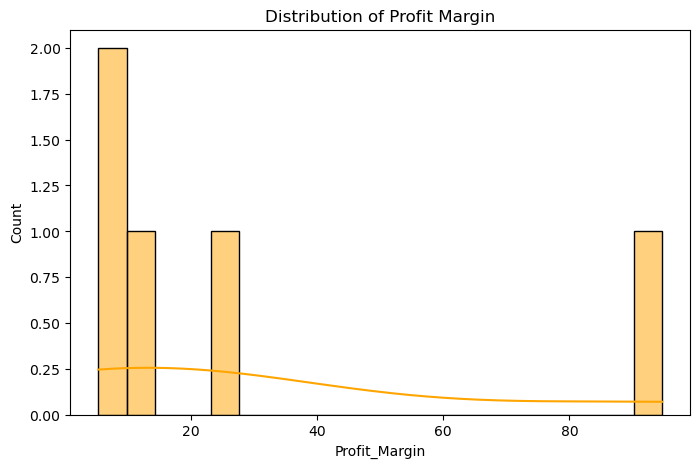

In [91]:
# Profit Margin 
plt.figure(figsize=(8,5))
sns.histplot(df["Profit_Margin"].head(), bins=20, kde=True, color="orange")
plt.title("Distribution of Profit Margin")
plt.show()

# Numerical vs Numerical

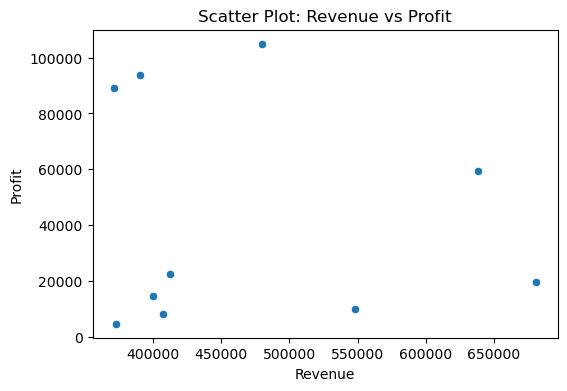

In [115]:
# Scatter Plot: Revenue vs Profit
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Revenue'].head(10), y=df['Profit'])
plt.title('Scatter Plot: Revenue vs Profit')
plt.xlabel('Revenue')
plt.ylabel('Profit')
plt.show()

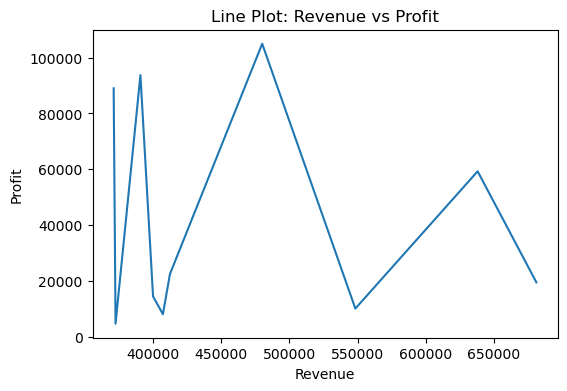

In [117]:
# Line Plot: Revenue vs Profit
plt.figure(figsize=(6,4))
sns.lineplot(x=df['Revenue'].head(10), y=df['Profit'])
plt.title('Line Plot: Revenue vs Profit')
plt.xlabel('Revenue')
plt.ylabel('Profit')
plt.show()

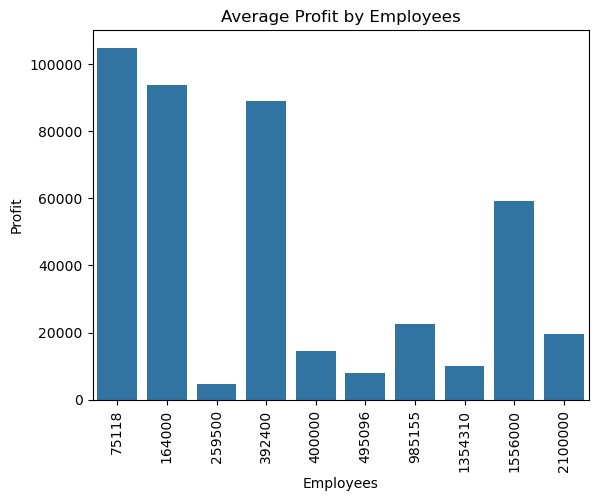

In [119]:
sns.barplot(x=df['Employees'].head(10), y=df['Profit'])
plt.title('Average Profit by Employees')
plt.xlabel('Employees')
plt.xticks(rotation=90)
plt.ylabel('Profit')
plt.show()

# Numerical vs categorical

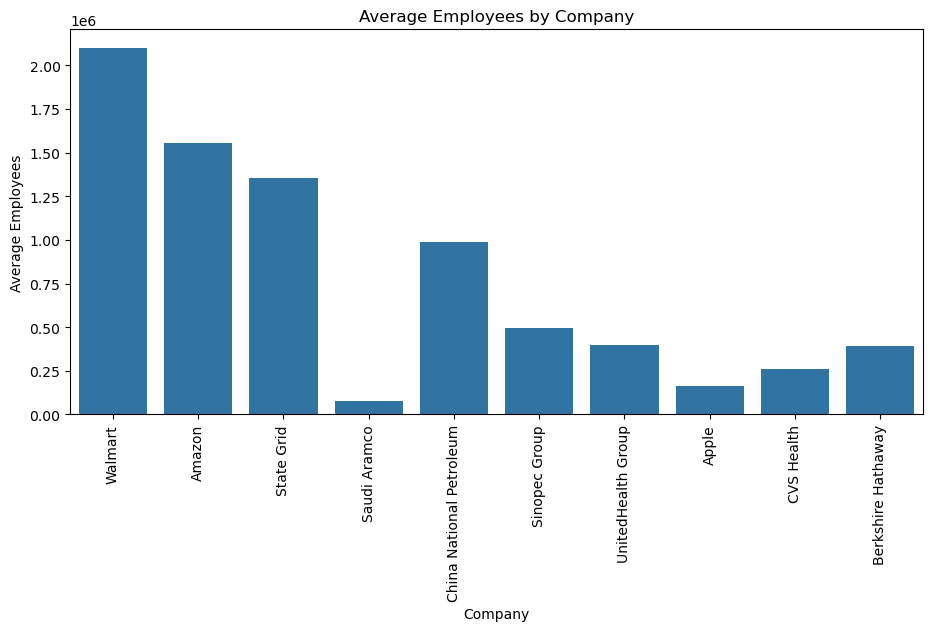

In [121]:

plt.figure(figsize=(11,5))
sns.barplot(x=df['Company'].head(10), y=df['Employees'])
plt.title('Average Employees by Company')
plt.xticks(rotation=90)
plt.xlabel('Company')
plt.ylabel('Average Employees')
plt.show()

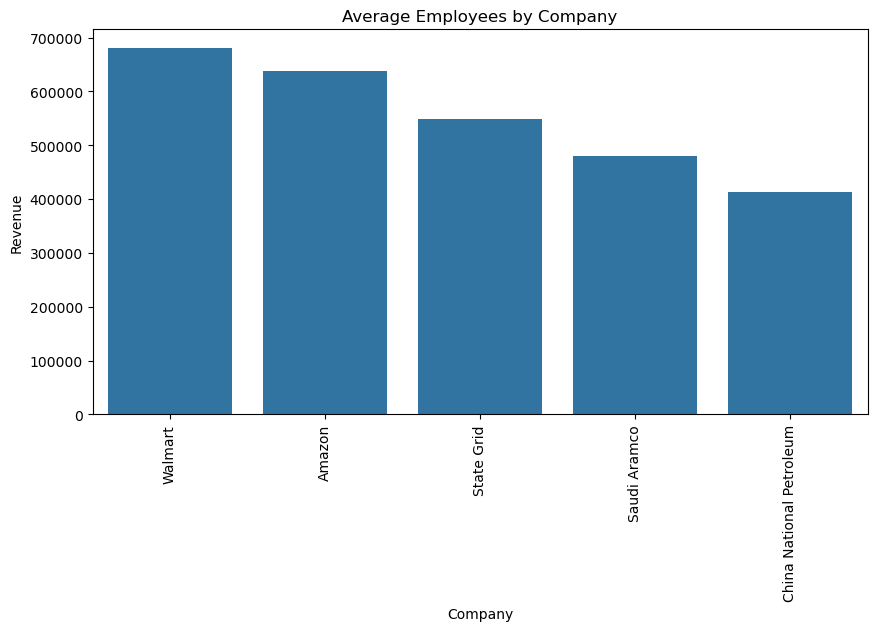

In [123]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Company'].head(), y=df['Revenue'])
plt.title('Average Employees by Company')
plt.xticks(rotation=90)
plt.xlabel('Company')
plt.ylabel('Revenue')
plt.show()

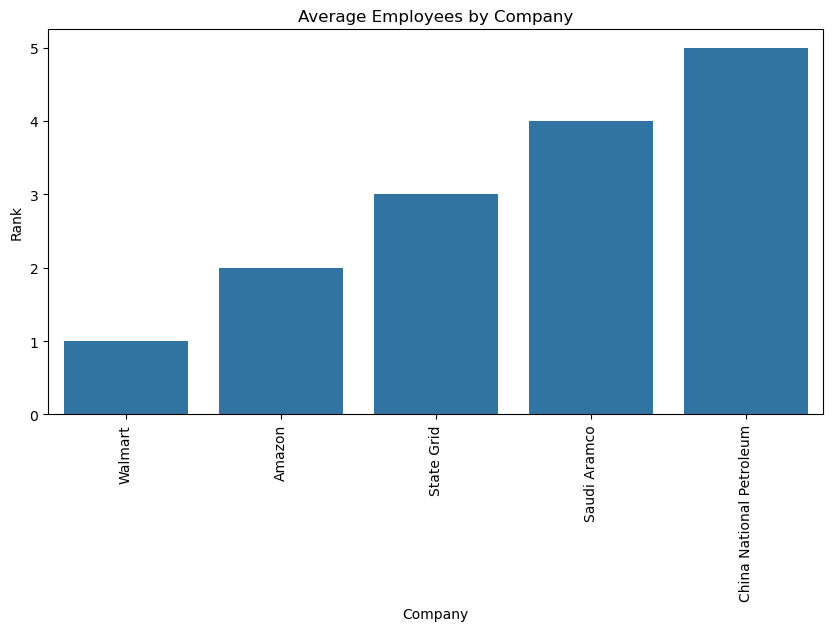

In [125]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Company'].head(), y=df['Rank'])
plt.title('Average Employees by Company')
plt.xticks(rotation=90)
plt.xlabel('Company')
plt.ylabel('Rank')
plt.show()

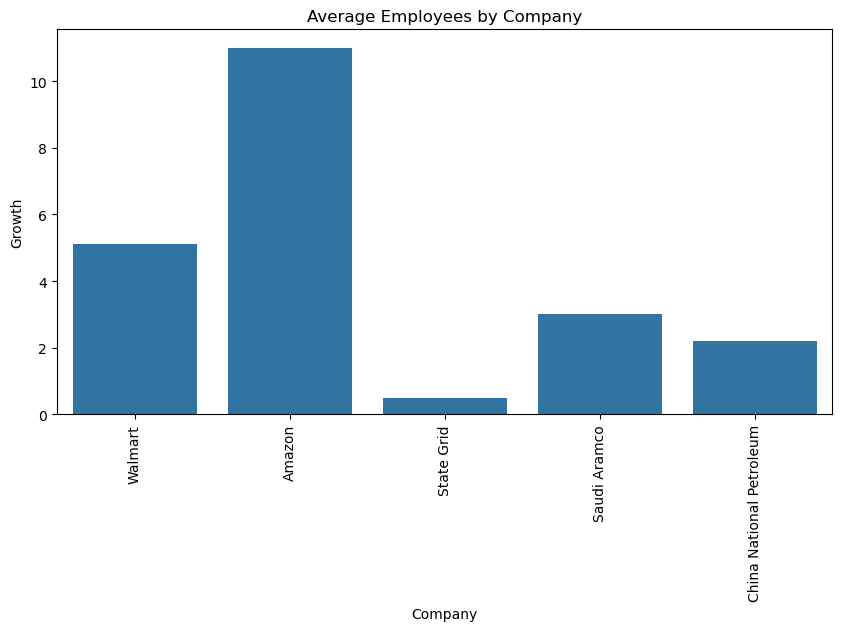

In [126]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Company'].head(), y=df['Growth'])
plt.title('Average Employees by Company')
plt.xticks(rotation=90)
plt.xlabel('Company')
plt.ylabel('Growth')
plt.show()

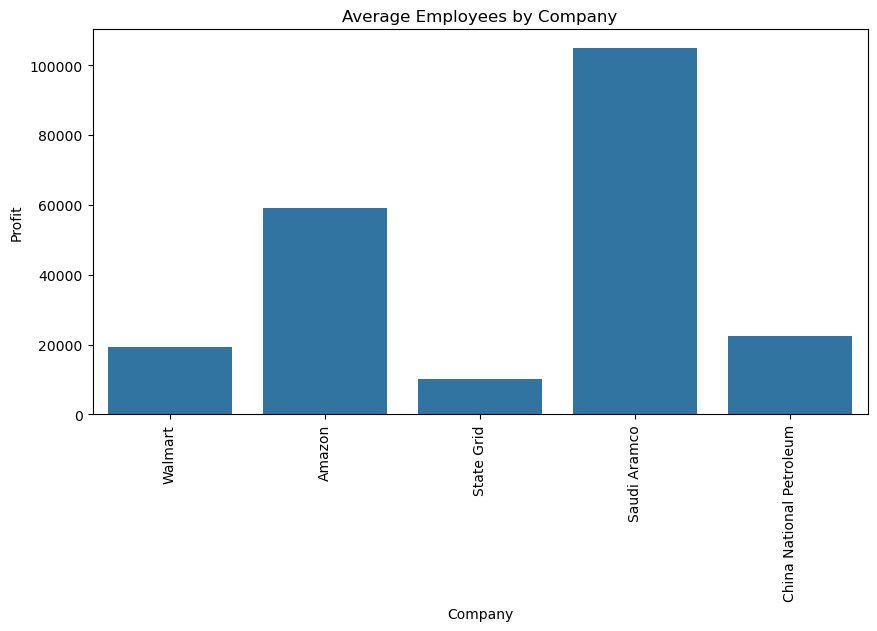

In [128]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Company'].head(), y=df['Profit'])
plt.title('Average Employees by Company')
plt.xticks(rotation=90)
plt.xlabel('Company')
plt.ylabel('Profit')
plt.show()

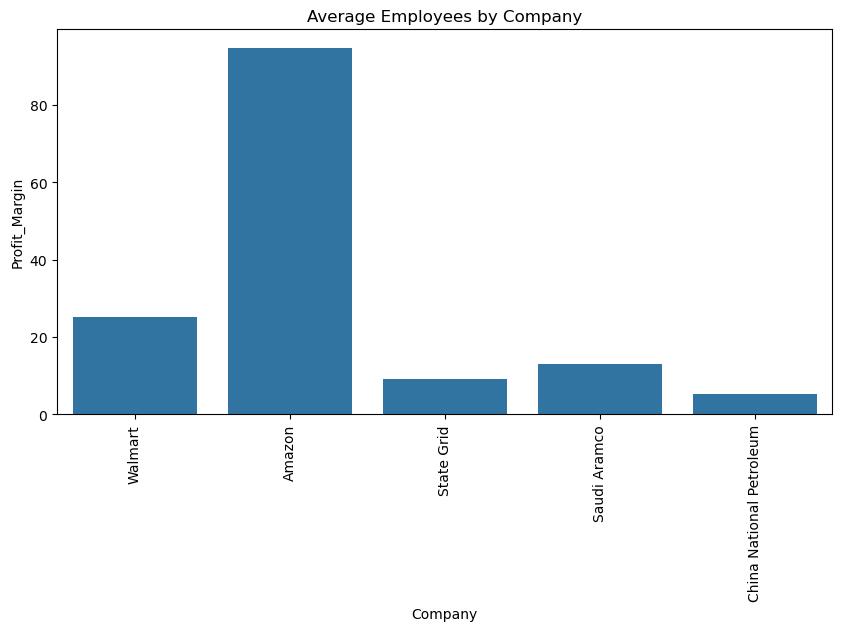

In [129]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Company'].head(), y=df['Profit_Margin'])
plt.title('Average Employees by Company')
plt.xticks(rotation=90)
plt.xlabel('Company')
plt.ylabel('Profit_Margin')
plt.show()

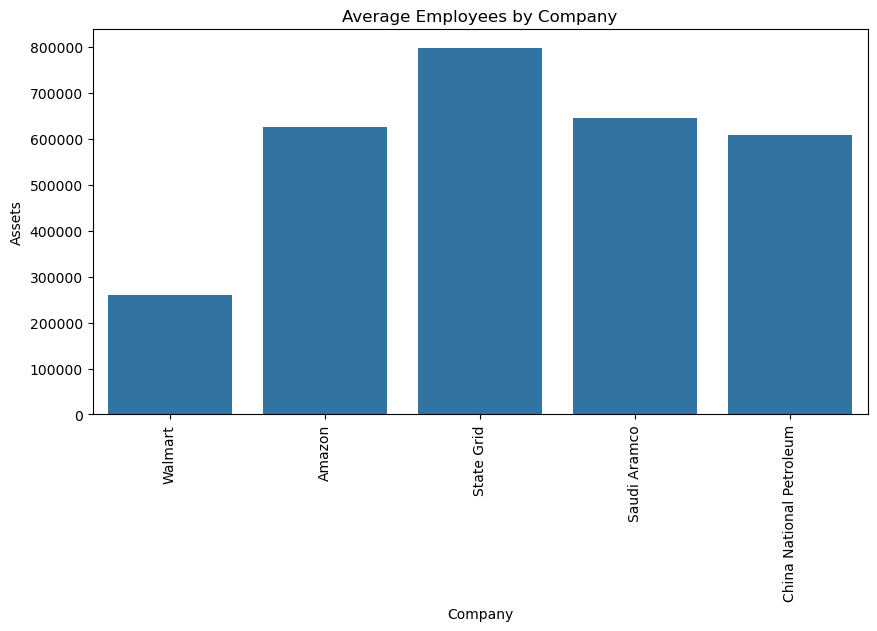

In [133]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Company'].head(), y=df['Assets'])
plt.title('Average Employees by Company')
plt.xticks(rotation=90)
plt.xlabel('Company')
plt.ylabel('Assets')
plt.show()

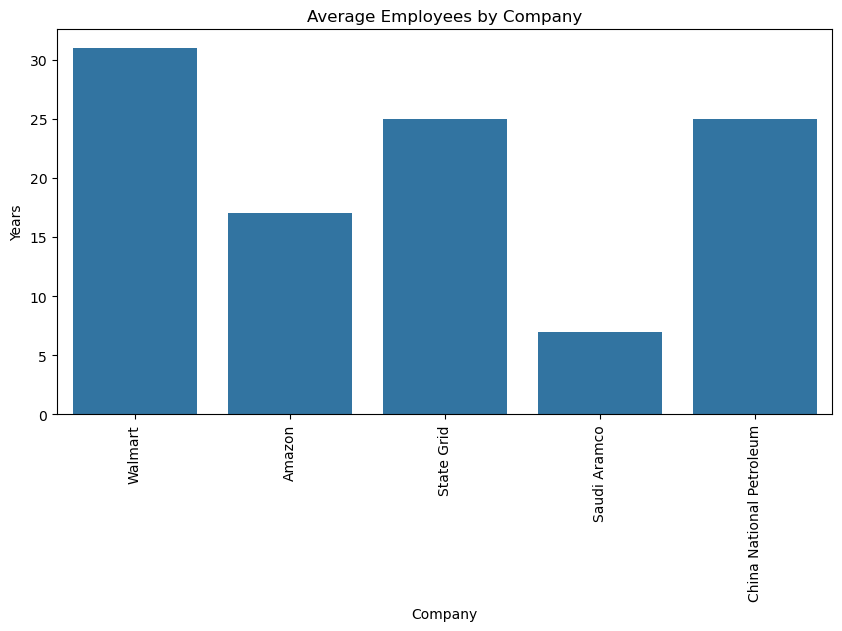

In [136]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Company'].head(), y=df['Years'])
plt.title('Average Employees by Company')
plt.xticks(rotation=90)
plt.xlabel('Company')
plt.ylabel('Years')
plt.show()

# Insights

# 1 High revenue does NOT always mean high profit

In the Fortune 500 list, many companies have:

Very high revenue

But low profit

Because of thin profit margins

Example Insight Statement:
Some companies generate huge revenue but their profitability is low, indicating high operational costs or low margins.

In [217]:
high_revenue=df.sort_values('Revenue',ascending=False).head(10)
high_revenue[["Rank",'Company','Revenue','Profit','Profit_Margin']]

,Rank,Company,Revenue,Profit,Profit_Margin
0,1,Walmart,680985.0,19436.0,25.3
500,1,Walmart,648125.0,15511.0,32.8
1,2,Amazon,637959.0,59248.0,94.7
1000,1,Walmart,611289.0,11680.0,14.6
1001,2,Saudi Aramco,603651.4,159069.0,51.0
501,2,Amazon,574785.0,30425.0,0.0
1500,1,Walmart,572754.0,13673.0,1.2
2000,1,Walmart,559151.0,13510.0,9.2
2,3,State Grid,548414.4,10044.9,9.1
502,3,State Grid,545947.5,9204.3,12.4


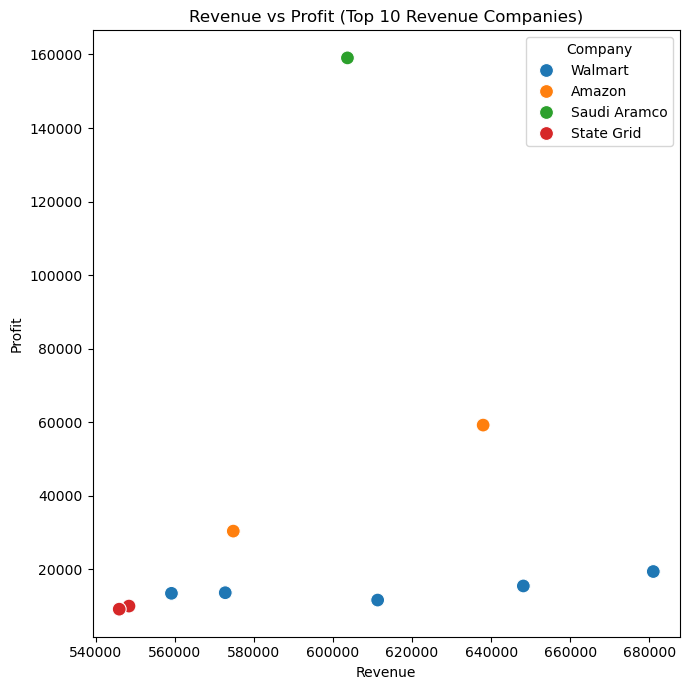

In [219]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=high_revenue, x="Revenue", y="Profit", s=100,hue='Company')
plt.title("Revenue vs Profit (Top 10 Revenue Companies)")
plt.xlabel("Revenue")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()


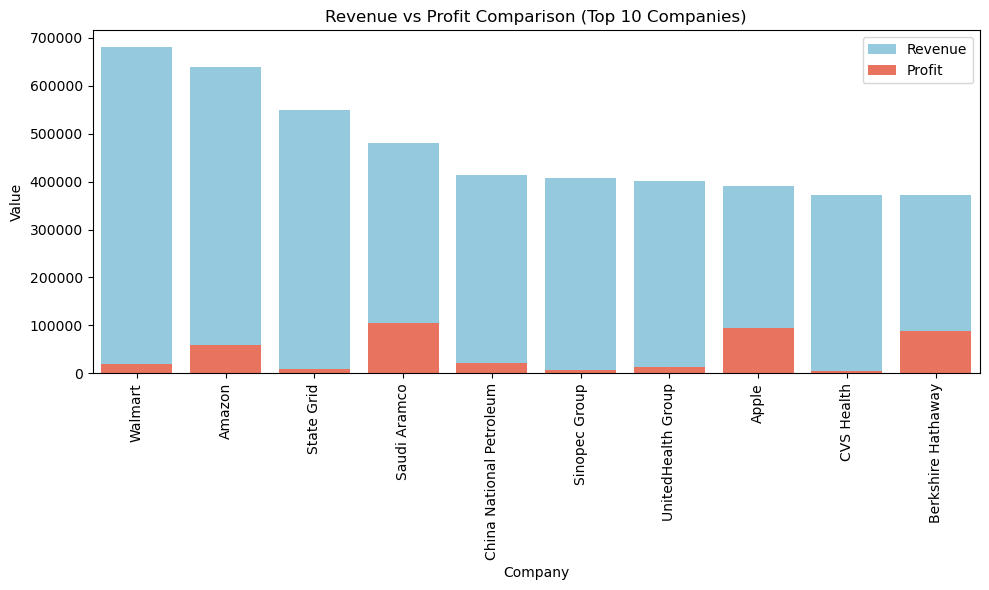

In [143]:
plt.figure(figsize=(10,6))
sns.barplot(data=high_revenue, x="Company", y="Revenue", color="skyblue", label="Revenue")
sns.barplot(data=high_revenue, x="Company", y="Profit", color="tomato", label="Profit")
plt.xticks(rotation=90)
plt.title("Revenue vs Profit Comparison (Top 10 Companies)")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()


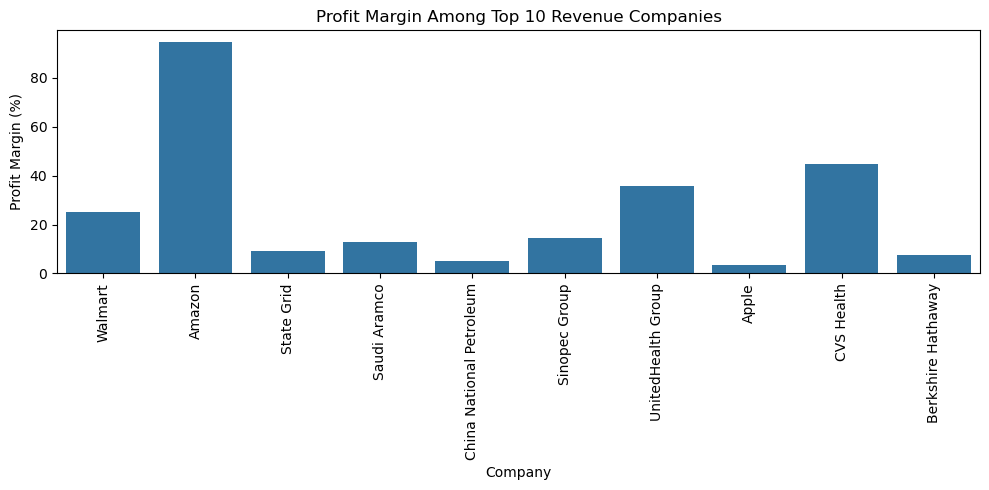

In [144]:
plt.figure(figsize=(10,5))
sns.barplot(data=high_revenue, x="Company", y="Profit_Margin")
plt.xticks(rotation=90)
plt.title("Profit Margin Among Top 10 Revenue Companies")
plt.ylabel("Profit Margin (%)")
plt.tight_layout()
plt.show()


# 2 Profit Margin tells a different story than Profit

Two companies can have:

Same profit

But completely different efficiency

Example Insight:

Companies with high profit margins are more efficient and earn more money per dollar of revenue, even if their total revenue is lower.

In [147]:
profit_margin=df.sort_values('Profit_Margin',ascending=False).head(10)
profit_margin[["Rank",'Company','Profit','Profit_Margin']]

,Rank,Company,Profit,Profit_Margin
1,2,Amazon,59248.0,94.7
8,9,CVS Health,4614.0,44.7
6,7,UnitedHealth Group,14405.0,35.6
0,1,Walmart,19436.0,25.3
5,6,Sinopec Group,8036.4,14.5
3,4,Saudi Aramco,104982.3,13.0
2,3,State Grid,10044.9,9.1
9,10,Berkshire Hathaway,88995.0,7.5
4,5,China National Petroleum,22424.0,5.3
7,8,Apple,93736.0,3.4


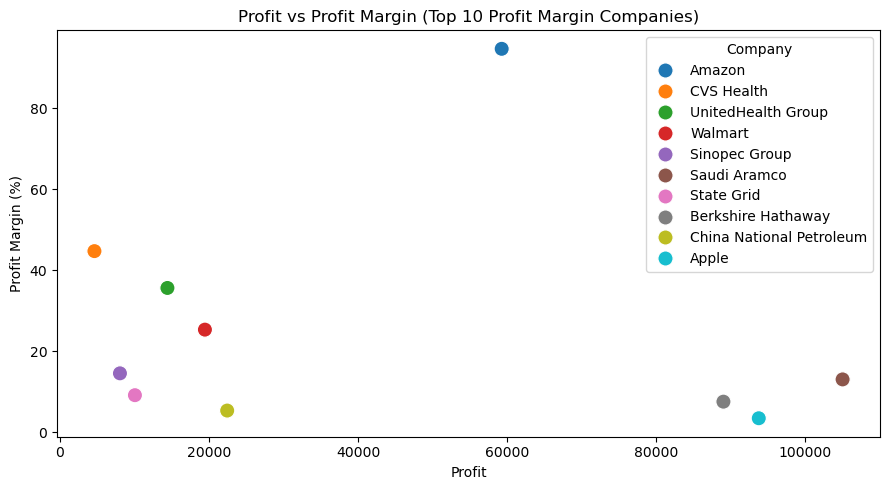

In [148]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=profit_margin,x="Profit",y="Profit_Margin",hue="Company",s=120)
plt.title("Profit vs Profit Margin (Top 10 Profit Margin Companies)")
plt.xlabel("Profit")
plt.ylabel("Profit Margin (%)")
plt.tight_layout()
plt.show()


In [151]:
sns.scatterplot(data=revenue, x="Employees", y="Revenue", hue="Company", s=100)
plt.title("Employees vs Revenue (Top 20 Biggest Employers)")
plt.xlabel("Employees")
plt.ylabel("Revenue")
plt.legend(title="Company")
plt.show()


NameError: name 'revenue' is not defined

# 3 Revenue is highly correlated with Employees

Large companies hire more people because they operate at massive scale.

- Insight:

Revenue and Employees show a strong positive relationship. Bigger workforces support higher revenue generation.

In [155]:
revenue=df.sort_values('Employees',ascending=False).head(10)
revenue[["Rank",'Company','Revenue','Employees']]

,Rank,Company,Revenue,Employees
0,1,Walmart,680985.0,2100000
1,2,Amazon,637959.0,1556000
2,3,State Grid,548414.4,1354310
4,5,China National Petroleum,412645.3,985155
5,6,Sinopec Group,407490.1,495096
6,7,UnitedHealth Group,400278.0,400000
9,10,Berkshire Hathaway,371433.0,392400
8,9,CVS Health,372809.0,259500
7,8,Apple,391035.0,164000
3,4,Saudi Aramco,480193.5,75118


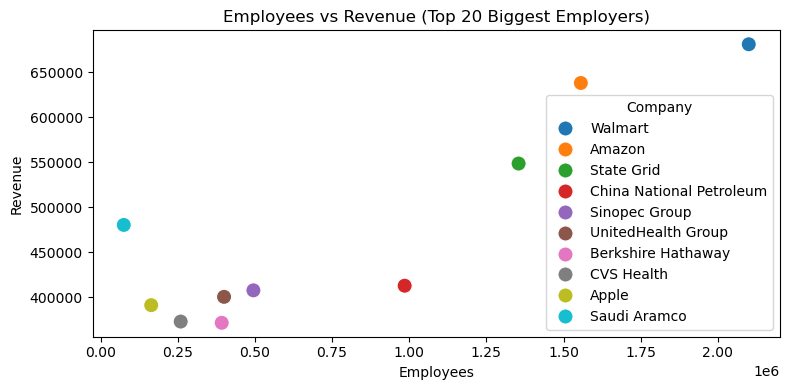

In [157]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=revenue, x="Employees", y="Revenue", hue="Company", s=120)
plt.title("Employees vs Revenue (Top 20 Biggest Employers)")
plt.xlabel("Employees")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


# 4 Profit correlates strongly with Assets

Companies with more assets (factories, tech, machines, infrastructure) usually produce more profit.

- Insight:

Profit and Assets are highly related, suggesting that companies with a large asset base generate greater income.

In [160]:
profit=df.sort_values('Profit',ascending=False).head(20)
profit[["Rank",'Company','Profit','Assets']]

,Rank,Company,Profit,Assets
3,4,Saudi Aramco,104982.3,645097.2
7,8,Apple,93736.0,364980.0
9,10,Berkshire Hathaway,88995.0,1153881.0
1,2,Amazon,59248.0,624894.0
4,5,China National Petroleum,22424.0,607615.1
0,1,Walmart,19436.0,260823.0
6,7,UnitedHealth Group,14405.0,298278.0
2,3,State Grid,10044.9,797694.0
5,6,Sinopec Group,8036.4,375395.1
8,9,CVS Health,4614.0,253215.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_16992\1587535497.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profit, x='Profit', y='Company', palette='viridis')


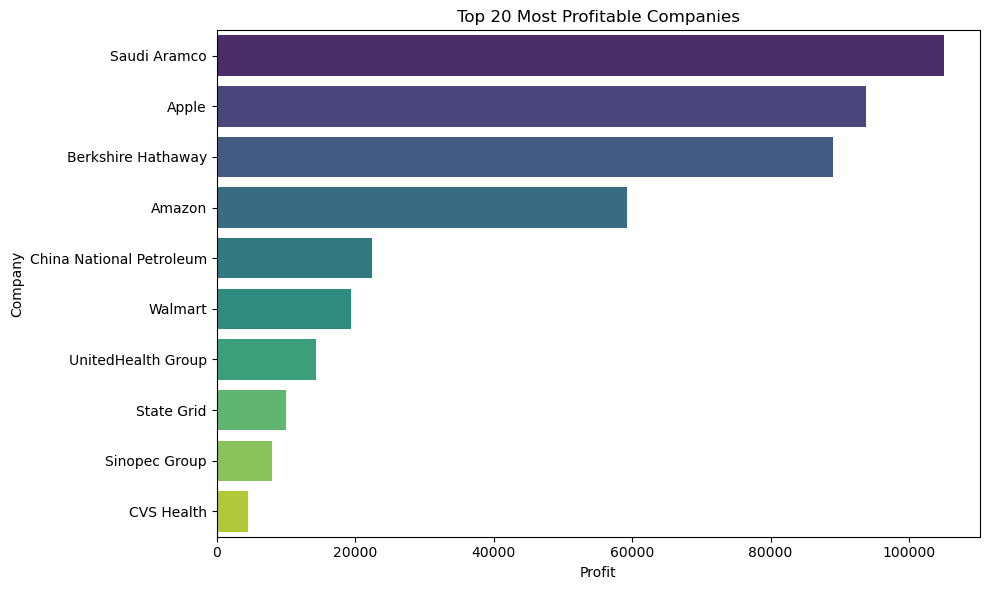

In [162]:
plt.figure(figsize=(10,6))
sns.barplot(data=profit, x='Profit', y='Company', palette='viridis')

plt.title("Top 20 Most Profitable Companies")
plt.xlabel("Profit")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

# 5 Fast growth companies don’t always make high profit

Growth (%) represents change from last year.

- Insight:

High growth companies are not always profitable. Some fast-growing firms may be reinvesting revenue or operating in competitive sectors.

In [165]:
Rank=df.sort_values('Rank',ascending=True).head(20)
Rank[["Rank",'Company','Profit']]

,Rank,Company,Profit
0,1,Walmart,19436.0
1,2,Amazon,59248.0
2,3,State Grid,10044.9
3,4,Saudi Aramco,104982.3
4,5,China National Petroleum,22424.0
5,6,Sinopec Group,8036.4
6,7,UnitedHealth Group,14405.0
7,8,Apple,93736.0
8,9,CVS Health,4614.0
9,10,Berkshire Hathaway,88995.0


# 6 Rank does not perfectly reflect Profit

Rank is based mainly on revenue.
Profit ranking can be very different.

- Insight:

A company may rank high by revenue but still have relatively low profit, meaning rank alone does not indicate financial strength.

In [168]:
profit=df.sort_values('Profit',ascending=False).head(20)
profit[["Rank",'Company','Profit']]

,Rank,Company,Profit
3,4,Saudi Aramco,104982.3
7,8,Apple,93736.0
9,10,Berkshire Hathaway,88995.0
1,2,Amazon,59248.0
4,5,China National Petroleum,22424.0
0,1,Walmart,19436.0
6,7,UnitedHealth Group,14405.0
2,3,State Grid,10044.9
5,6,Sinopec Group,8036.4
8,9,CVS Health,4614.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_16992\1587535497.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profit, x='Profit', y='Company', palette='viridis')


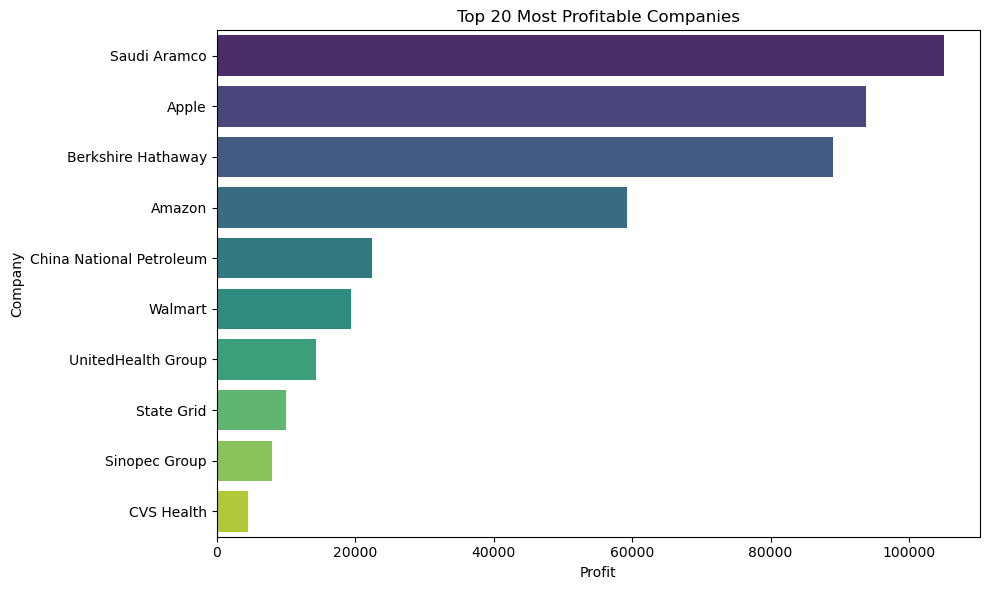

In [170]:
plt.figure(figsize=(10,6))
sns.barplot(data=profit, x='Profit', y='Company', palette='viridis')

plt.title("Top 20 Most Profitable Companies")
plt.xlabel("Profit")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

# 7. Asset-heavy companies tend to have lower Profit Margins

Large asset companies (transport, energy, manufacturing) have:

Higher operating cost

Lower profit margin

- Insight:

Companies with very high assets generally show lower profit margins because of maintenance, production, and logistics costs.

In [172]:
Asset=df.sort_values('Assets',ascending=False).head(20)
Asset[["Rank",'Company','Profit','Assets']]

,Rank,Company,Profit,Assets
9,10,Berkshire Hathaway,88995.0,1153881.0
2,3,State Grid,10044.9,797694.0
3,4,Saudi Aramco,104982.3,645097.2
1,2,Amazon,59248.0,624894.0
4,5,China National Petroleum,22424.0,607615.1
5,6,Sinopec Group,8036.4,375395.1
7,8,Apple,93736.0,364980.0
6,7,UnitedHealth Group,14405.0,298278.0
0,1,Walmart,19436.0,260823.0
8,9,CVS Health,4614.0,253215.0


In [1]:
plt.figure(figsize=(10,6))
sns.barplot(data=Asset, x='Assets', y='Company', palette='plasma')

plt.title("Top 20 Companies by Total Assets")
plt.xlabel("Assets")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

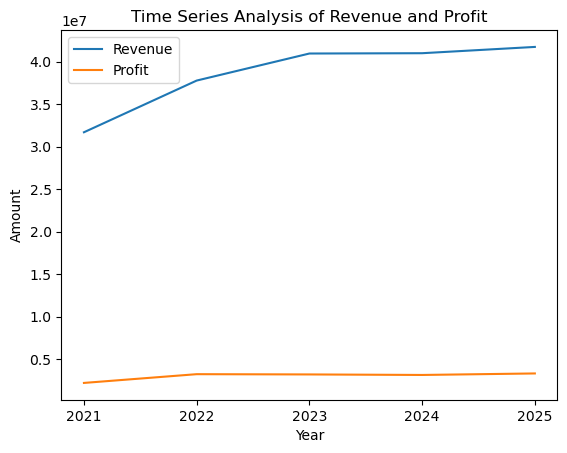

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("fortune500_2021_2025.csv")

# Aggregate by year
yearly = df.groupby("Year")[["Revenue", "Profit"]].sum().reset_index()

# Plot both on one graph
plt.figure()
plt.plot(yearly["Year"], yearly["Revenue"], label="Revenue")
plt.plot(yearly["Year"], yearly["Profit"], label="Profit")

# FIX: force integer years on x-axis
plt.xticks(yearly["Year"])

plt.xlabel("Year")
plt.ylabel("Amount")
plt.title("Time Series Analysis of Revenue and Profit")
plt.legend()
plt.show()
